In [31]:
from medcat.cat import CAT
from medcat.cat import CAT
from medcat.cdb import CDB
from medcat.config import Config
from medcat.vocab import Vocab
from medcat.meta_cat import MetaCAT
from medcat.preprocessing.tokenizers import TokenizerWrapperBPE
from tokenizers import ByteLevelBPETokenizer
import time
import matplotlib.pyplot as plt



unzip = './medcat_model/'
# Load the vocab model you downloaded
vocab = Vocab.load(unzip+'vocab.dat')
# Load the cdb model you downloaded
cdb = CDB.load(unzip+'cdb.dat')

# needed to add these two lines
cdb.config.linking.filters.cuis = set()
cdb.config.general.spacy_model = unzip+'spacy_model'

# Download the mc_status model from the models section below and unzip it
mc_status = MetaCAT.load(unzip+'meta_Status/')
cat = CAT(cdb=cdb, config=cdb.config, vocab=vocab, meta_cats=[mc_status])


/Users/feiyue/opt/anaconda3/lib/python3.8/site-packages/spacy/util.py:887: UserWarning: [W095] Model 'en_core_web_md' (3.1.0) was trained with spaCy v3.1 and may not be 100% compatible with the current version (3.5.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [32]:
# Generate test text
n_texts_100 = 100
n_texts_100000 = 100000

test_texts_100 = ["This is test text number " + str(i) for i in range(n_texts_100)]
test_texts_100000 = ["This is test text number " + str(i) for i in range(n_texts_100000)]

# Testing the speed of processing 100 texts using the get_entities() function.
start_time = time.time()
for text in test_texts_100:
    entities = cat.get_entities(text)
end_time = time.time()
print("Processed {0} texts in {1:.2f} seconds using get_entities() function.".format(n_texts_100, end_time - start_time))

# Testing the speed of processing 100,000 texts using the get_entities() function.
start_time = time.time()
for text in test_texts_100000:
    entities = cat.get_entities(text)
end_time = time.time()
print("Processed {0} texts in {1:.2f} seconds using get_entities() function.".format(n_texts_100000, end_time - start_time))


# Test the speed of using the multiprocessing function to process 100 texts.
start_time = time.time()

# Process the texts in parallel using MedCAT's multiprocessing function
batch_size_chars = 500 # Set the batch size in characters
results = cat.multiprocessing(test_texts_100, batch_size_chars=batch_size_chars, nproc=2)
end_time = time.time()
print("Processed {0} texts in {1:.2f} seconds using multiprocessing function.".format(n_texts_100, end_time - start_time))

# Test the speed of using the multiprocessing function to process 100,000 texts.
start_time = time.time()

# Process the texts in parallel using MedCAT's multiprocessing function
batch_size_chars = 500 # Set the batch size in characters
results = cat.multiprocessing(test_texts_100000, batch_size_chars=batch_size_chars, nproc=2)
end_time = time.time()
print("Processed {0} texts in {1:.2f} seconds using multiprocessing function.".format(n_texts_100000, end_time - start_time))

Processed 100 texts in 0.75 seconds using get_entities() function.
Processed 100000 texts in 636.90 seconds using get_entities() function.
Processed 100 texts in 0.05 seconds using multiprocessing function.
Processed 100000 texts in 5.30 seconds using multiprocessing function.


In [33]:
# Define the list of texts to test
n_texts_list = [10,20,30,50,80,130,210,330,540,870,1410,2280,3690,5970,9660]
test_texts = ['This is a test sentence']*max(n_texts_list)
# Test the speed of using the get_entities() function to process texts of varying lengths
get_entities_times = []
for n_texts in n_texts_list:
    start_time = time.time()
    for text in test_texts[:n_texts]:
        entities = cat.get_entities(text)
    end_time = time.time()
    get_entities_times.append(end_time - start_time)


In [34]:
print(get_entities_times)

[0.08193278312683105, 0.1084909439086914, 0.14997625350952148, 0.2176380157470703, 0.4286370277404785, 0.5611248016357422, 0.9076430797576904, 1.5506339073181152, 2.4665191173553467, 3.875290870666504, 5.941608190536499, 9.628513097763062, 15.55862021446228, 25.367663145065308, 40.38692784309387]


In [35]:
# Test the speed of using the multiprocessing function to process texts of varying lengths

multiprocessing_times = []
batch_size_chars = 500 # Set the batch size in characters
for n_texts in n_texts_list:
    start_time = time.time()
    results = cat.multiprocessing(test_texts[:n_texts], batch_size_chars=batch_size_chars, nproc=2)
    end_time = time.time()
    multiprocessing_times.append(end_time - start_time)


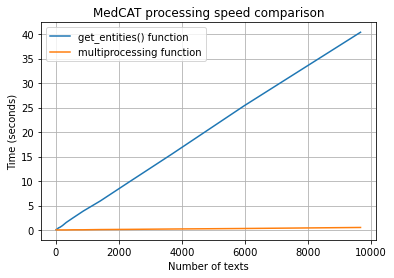

In [36]:
# Plot the results
fig, ax = plt.subplots()
ax.plot(n_texts_list, get_entities_times, label='get_entities() function')
ax.plot(n_texts_list, multiprocessing_times, label='multiprocessing function')
ax.set(xlabel='Number of texts', ylabel='Time (seconds)', title='MedCAT processing speed comparison')
ax.legend()
ax.grid()
plt.show()